In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

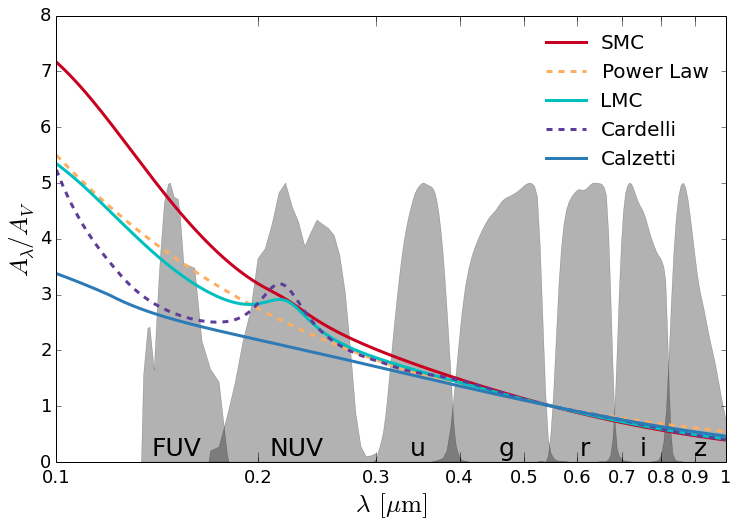

In [67]:
# I decided to plot vs lambda, not 1/lambda, because, well, there's no good
# reason to plot vs 1/lambda. The future is lit with the light of burning tradition

filternames = ['galex_FUV', 'galex_NUV', 'sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0']
header_lines = 2*[46] + 5*[74]
filters_dir = '/Users/kareem/Desktop/cla/sedpy/sedpy/data/filters/'

def read_filter_curve(filters_dir, filtername, header_line):
    '''
    read Sedpy transmission curves
    '''
    data = np.genfromtxt(filters_dir + filtername+'.par', skip_header = header_line)
    lambdas = data[:, 1]
    phis = data[:, 2]
    return lambdas, phis

all_filt_lambdas, all_filt_phis = [], []
for i, filtname in enumerate(filternames):
    lamma, phi = read_filter_curve(filters_dir = filters_dir, 
        filtername = filtname, header_line = header_lines[i])
    all_filt_lambdas.append(lamma)
    all_filt_phis.append(phi)

lambdas = np.logspace(3, 4, 1000) # angstroms

f = plt.figure(figsize = (12, 8))
ax = f.add_subplot(111)

colors = ['#ca0020', '#fdae61', 'c', '#5e3c99', '#2c7bb6']
ls = ['-', '--', '-', '--', '-', '-']
labels = ['SMC', 'Power Law', 'LMC', 'Cardelli', 'Calzetti']
dusts = [attenuation.smc(lambdas), attenuation.powerlaw(lambdas), attenuation.lmc(lambdas), 
         attenuation.cardelli(lambdas), attenuation.calzetti(lambdas)]


filtnames = ['FUV', 'NUV', 'u', 'g', 'r', 'i', 'z']
for i, l in enumerate(all_filt_lambdas):
    ax.fill_between((l/(1e4)), 5*all_filt_phis[i]/np.max(all_filt_phis[i]), 
            label = filtnames[i], color = 'k', alpha = 0.3)
for i, d in enumerate(dusts):
    ax.plot((lambdas/1e4), d, ls[i], label = labels[i], lw = 3, color = colors[i])
ax.legend(loc = 'best', frameon = False, fontsize = 20)
ax.set_xlabel(r'$\lambda\,[\rm \mu m]$', fontsize = 25)
ax.set_ylabel(r'$A_{\lambda}/A_V$', fontsize = 25)
ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)
ax.set_ylim(0, 8)
ax.set_xlim(0.1, 1)
ax.set_xscale('log')
xticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
textx = [0.14, 0.21, 0.34, 0.46, 0.61, 0.75, 0.9]
for i, tex in enumerate(textx):
    ax.text(tex, 0.12, filtnames[i], fontsize=25)
plt.savefig('dust_plus_filters.pdf', dpi = 400, bbow_inches = 'tight')

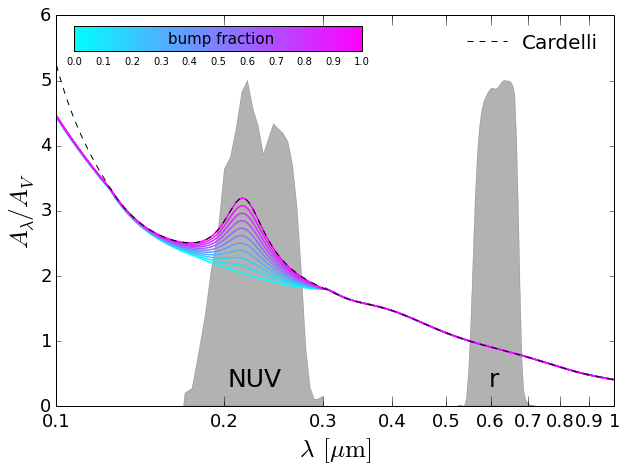

In [122]:
from matplotlib.cm import cool as this_cmap
from matplotlib.colors import Normalize
import matplotlib.cm as cm

f = plt.figure(figsize=(10, 7))
ax = f.add_subplot(111)
    
normalize = Normalize(vmin=0, vmax=1)
desired_filt_lambdas = [all_filt_lambdas[1], all_filt_lambdas[4]]
desired_filt_phis = [all_filt_phis[1], all_filt_phis[4]]
for i, l in enumerate(desired_filt_lambdas):
    ax.fill_between((l/(1e4)), 5*desired_filt_phis[i]/np.max(desired_filt_phis[i]), 
          color = 'k', alpha = 0.3)
bump_fractions = np.linspace(0, 1, 11)
for frac in bump_fractions:
    A_lambda = attenuation.conroy(lambdas, f_bump=frac)
    ax.semilogx(lambdas/1e4, A_lambda, color=this_cmap(normalize(frac)), lw=1.5)

ax.plot(lambdas/1e4, attenuation.cardelli(lambdas), 'k--',lw = 1, label='Cardelli')
ax.xaxis.set_tick_params(labelsize = 18)
ax.yaxis.set_tick_params(labelsize = 18)
ax.set_ylim(0, 6)
ax.set_xlim(0.1, 1)
xticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.legend(loc = 'best', frameon = False, fontsize = 20)
ax.set_xlabel(r'$\lambda\,[\rm \mu m]$', fontsize = 25)
ax.set_ylabel(r'$A_{\lambda}/A_V$', fontsize = 25)

textx = [0.205, 0.6]
filtnames = ['NUV', 'r']
for i, tex in enumerate(textx):
    ax.text(tex, 0.3, filtnames[i], fontsize=25)
    
appaple = cm.ScalarMappable(norm=normalize, cmap=this_cmap)
appaple.set_array(np.linspace(0, 2))
cax = f.add_axes([0.15, 0.83, 0.4, 0.05])
f.text(0.28, 0.845, 'bump fraction', fontsize = 15)
cbar = f.colorbar(appaple, cax=cax, orientation='horizontal')
cbar.solids.set_rasterized(True)
cbar.solids.set_edgecolor("face")
plt.savefig('bump_fractions_and_filters.pdf', dpi = 400, bbow_inches = 'tight')

In [ ]:
# If we know the galaxy, has a conroy extinction curve, we can measure
# the flux ratio in NUV and some band not affected by the bump, like 
# r, to constrain the bump fraction